In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

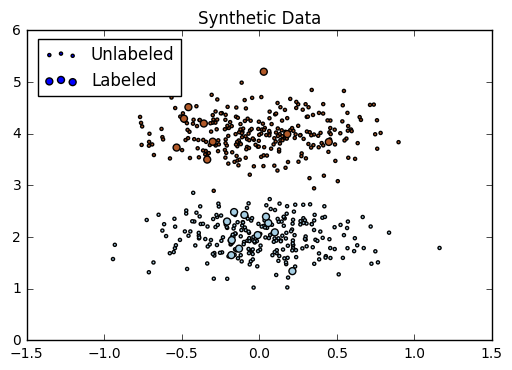

In [2]:
X, y = datasets.make_blobs(n_samples=1000, centers=[[0, 2], [0, 4]], 
                           cluster_std=[0.35, 0.35], random_state=1)
y[y == 0] = -1

n_label = 20
n_unlabel = 500

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

plt.scatter(X_unlabel[:,0], X_unlabel[:,1], c=y_unlabel, cmap=plt.cm.Paired, s=5)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=25)
plt.legend(['Unlabeled', 'Labeled'], bbox_to_anchor=(.35,1))
plt.title('Synthetic Data')
plt.show()

In [25]:
def plt_decision_boundry(model, X, kernel='linear'):
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Determine decision boundry
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    b_test = list(np.c_[XX.ravel(), YY.ravel()])
    
    if kernel == 'rbf':
        b_test = x_to_rbf(b_test, n=50, gamma=1.0)
    
    Z = model.decision_function(b_test)

    # Put the result into a color plot
    Z = np.asarray(Z)
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

Score on labeled data in SGD: 0.5125
-2.55529278813


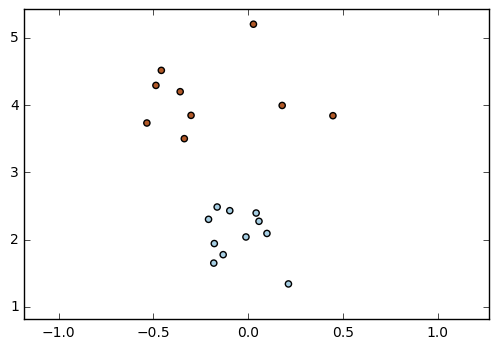

In [4]:
from svm_custom import SVM_SGD

mysgd = SVM_SGD(eta0=1, alpha=0.0001)
mysgd.fit(X_label, y_label)

print('Score on labeled data in SGD:', mysgd.score(X_test, y_test))

plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired)
plt_decision_boundry(mysgd, X)
plt.show()

Score on all train data in SGD: 0.995833333333
-2.93783349675


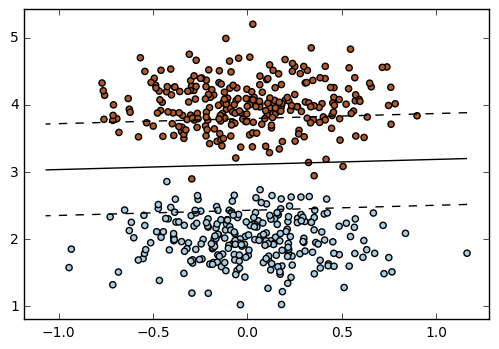

In [5]:
from svm_custom import SVM_SGD

mysgd = SVM_SGD(eta0=1, alpha=0.015)
mysgd.fit(X_train, y_train)

print('Score on all train data in SGD:', mysgd.score(X_test, y_test))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Paired)
plt_decision_boundry(mysgd, X)
plt.show()

Score adding 500 unlabled samples: 0.997916666667
-2.73021170692


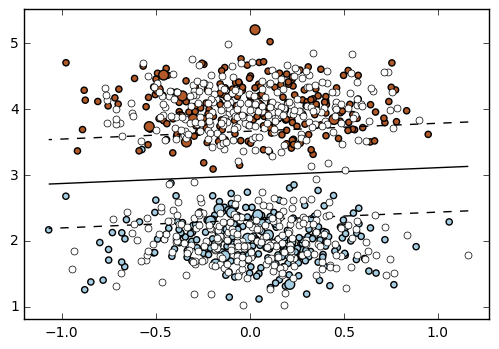

In [6]:
from ssl_svm import S3VM_SGD

s3vm = S3VM_SGD(knn=5, eta0=1, alpha=0.015, buffer_size=50)
num = 500
s3vm.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm.score(X_test, y_test))

plt.plot(X_unlabel[:,0], X_unlabel[:,1], 'wo', markersize=5)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=50)

plt_decision_boundry(s3vm, X)
plt.show()

     pcost       dcost       gap    pres   dres
 0:  1.4065e+01 -1.0995e+03  3e+03  6e-01  1e-14
 1:  5.0735e+01 -1.7247e+02  2e+02  1e-15  1e-14
 2:  6.1259e+00 -1.6370e+01  2e+01  1e-15  7e-15
 3: -5.3341e-01 -3.2462e+00  3e+00  3e-16  5e-15
 4: -1.3031e+00 -1.9775e+00  7e-01  2e-16  2e-15
 5: -1.7971e+00 -2.0026e+00  2e-01  9e-16  4e-15
 6: -1.8825e+00 -1.8847e+00  2e-03  6e-16  4e-15
 7: -1.8834e+00 -1.8835e+00  2e-05  2e-16  5e-15
 8: -1.8834e+00 -1.8834e+00  2e-07  2e-16  5e-15
Optimal solution found.
Score using label and QP: 0.997916666667
-3.50067030476


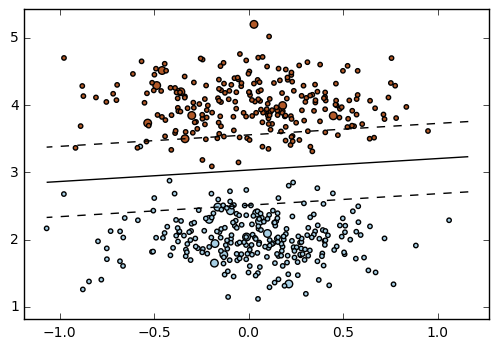

In [7]:
from svm_custom import SVM

mysvm = SVM(C=10)
mysvm.fit(X_label, y_label)

print('Score using label and QP:', mysvm.score(X_test, y_test))

#plt.plot(X_unlabel[:,0], X_unlabel[:,1], 'wo', markersize=5)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=30)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, s=10)
plt_decision_boundry(mysvm, X)
plt.show()

In [8]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures

def x_to_poly(x, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(x)

def x_to_rbf(x, gamma=1.0, n=100):
    rbf_feature = RBFSampler(gamma=gamma, n_components=n, random_state=1)
    return rbf_feature.fit_transform(x)

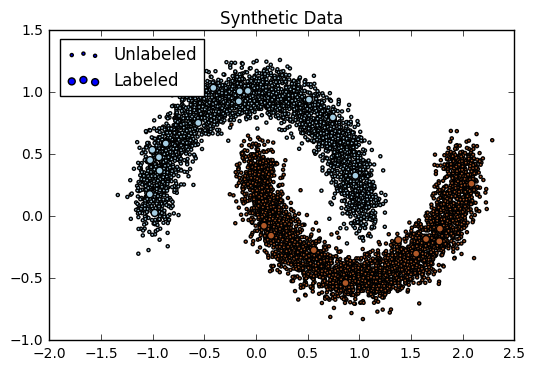

In [73]:
X, y = datasets.make_moons(n_samples=10000, noise=0.1)
y[y == 0] = -1

n_label = 25
n_unlabel = 7000

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

plt.scatter(X_unlabel[:,0], X_unlabel[:,1], c=y_unlabel, cmap=plt.cm.Paired, s=5)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=25)
plt.legend(['Unlabeled', 'Labeled'], bbox_to_anchor=(.35,1))
plt.title('Synthetic Data')
plt.show()

X_label = x_to_rbf(X_label, n=50, gamma=1.0)
X_unlabel = x_to_rbf(X_unlabel, n=50, gamma=1.0)
X_train = x_to_rbf(X_train, n=50, gamma=1.0)
X_test = x_to_rbf(X_test, n=50, gamma=1.0)

Score on all train data in SGD: 0.974453781513


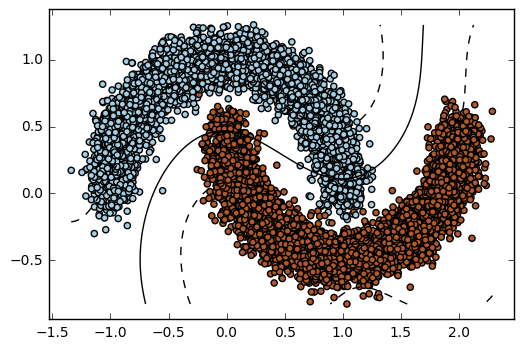

In [74]:
mysgd = SVM_SGD(eta0=1, alpha=0.015)
mysgd.fit(X_train, y_train)

print('Score on all train data in SGD:', mysgd.score(X_test, y_test))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt_decision_boundry(mysgd, X, kernel='rbf')
plt.show()

Score adding 5000 unlabled samples: 0.814789915966


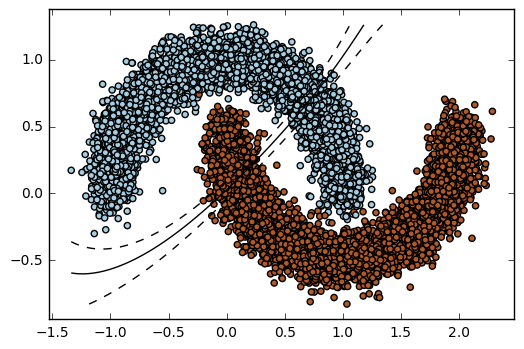

In [75]:
s3vm = S3VM_SGD(knn=5, eta0=1, alpha=0.0001, buffer_size=50)
num = 5000
s3vm.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm.score(X_test, y_test))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt_decision_boundry(s3vm, X, kernel='rbf')
plt.show()